# Estadística descriptiva y visualización

## Exploración inicial

El dataset es considerado de dominio público y ha sido publicado en el Kraggle y en GitHub, accesible usando las siguientes ligas:

* https://www.kaggle.com/mirichoi0218/insurance/home
* https://github.com/stedy/Machine-Learning-with-R-datasets

Por conveniencia, he copiado el dataset en el directorio del curso. De hecho, a estas alturas, ya debes tener una copia del mismo en tu instancia de Gitpod.

Cree un archivo para el ejercicio de hoy en Gitpod y agreguemos la siguiente "celda"

In [1]:
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Lo anterior debe ser ya conocido: nos muestra los primeros 5 renglones del dataset. Recuerda que cada renglón corresponde a una observación, mientras que cada columna corresponde a una variable, usando el vocabulario de estadística.

Usemos el siguiente comando para calcular los valores estadísticos de las variables numéricas del dataset.

In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Para reducir la ambigüedad, veamos el significado de cada una de las variables (cf. columnas en la tabla)

* `age`: Edad del titular del seguro. Nótese que la edad oscila entre 18 y 64 años, pues en los Estados Unidos el programa Medicare cubre a personas de 65 años en adelante.
* `sex`: Sexo del titular del seguro.
* `bmi`: Índice de masa corporal (_Body mass index_), que sirve a determinar la condición de peso de una persona (bajo vs. sobre peso, etc.) con respecto a su estatura. El BMI corresponde al peso (en kilogramos) divido por el cuadrado de la estatura (en metros). Un BMI es considerado ideal cuando está en el rango de 18.5 a 24.9.
* `children`: Numero de hijos (dependientes) cubiertos por el seguro.
* `smoker`: Variable categórica con valores `yes` o `no` indicando si el asegurado fuma regularmente o no.
* `region`: Lugar de residencia del beneficiario al interior de los Estados Unidos, dividido en cuatro regiones geográficas, i.e. noreste, sureste, suroeste y noreste. Por supuesto, el dataset usa la palabra en inglés que corresponde.
* `charges`: Costos facturados por el seguro médico.

## Visualización

Cómo se dice popularmente: una imagen dice más que mil palabras. Los números calculados en el paso anterior son interesantes pero pueden ser difíciles de interpretar. Para complementar esos números, construiremos algunos diagramas para visualizar la distribución de los valores asociados a algunas de las variables.

Sin embargo, antes de hacerlo, tenemos que instalar una librería de visualización llamada __seaborn__. Nota que existen múltiples librerías para este fin, sin embargo, seaborn me parece una de las más sencillas de usar.

En su terminal, ejecute el siguiente comando:

```
pip3 install seaborn
```

Podrás observar que seaborn agrega algunas otras librerías, de las cuales depende para su buen funcionamiento. El manejar las dependencias es responsabilidad de `pip3`.

Ahora, debemos importar la librería en nuestro programa. Agreguemos las siguientes lineas:

In [4]:
import seaborn as sns

sns.set_theme(style="white")

### Exploración de variables categóricas

Para comenzar, construyamos un diagrama de barra con la distribución de los contratos de seguro a través de las cuatro regiones geográficas incluidas en el dataset. Para eso, ejecuta la siguiente celda:

In [ ]:
sns.displot(x="region", data=df)

Como notarás, sólo debemos especificar la variable que aparecerá en el eje X. Seaborn infiere que queremos contar la frecuencia de observaciones, divididas por región. El segundo parámetro, nos permite indicar cual es el dataframe que contiene los datos que deberán ser usados en la generación del gráfico.

Probemos ahora la siguiente línea:

In [ ]:
sns.displot(x="region", hue="sex", multiple="stack", data=df)

En la línea anterior hemos particionado los datos ahora con la variable `sex`. El diagrama de barras muestra, apilados, la cuenta de observaciones por sexo y por región.

### Exploración de variables numéricas

Ahora pasemos a demostrar como podemos visualizar las variables discretas. Para esto, utilizaremos la variable `age`. En este caso, es cierto que el rango de valores de `age` es finito, pero el tener alrededor de 50 barras hace un diagrama difícil de interpretar. Por esta razón usaremos un histograma. Ejecute la siguiente celda que muestra como generarlo con `seaborn`.

In [ ]:
sns.displot(x="age", data=df)

Interesante, ¿no es cierto? El código es el mismo. `seaborn` nos propone, de manera automática, un número de barras (o "bins" en inglés). De hecho, en este caso, es posible cambiar el nombre de la función `displot` a `histplot`.

En este caso, nos es ventajoso el usar `histplot`. Pruebe el siguiente snippet. ¿Qué es lo que estamos haciendo?

In [ ]:
g = sns.histplot(data=df, x="age", multiple="stack", hue="sex")
for q in df.age.quantile([.25, .5, .75]):
    g.axvline(q, linestyle=":")
    g.text(q, 5, q)

### Análisis de correlación usando "heatmaps" y "scatterplots"

Métodos estadísticos, tales como el coeficiente de correlación de Pearson nos permiten caracterizar la correlación lineal entre dos variables numéricas. La biblioteca `pandas` ofrece una función para calcularlo. Probemos con nuestro dataset.

In [1]:
df.corr()

NameError: name 'df' is not defined

La visualización referida como _heatmap_ nos ofrece una forma para visualizar de manera conveniente la tabla de correlación anterior. Afortunadamente, `seaborn` nos ofrece un método muy sencillo para construir un heatmap:

<AxesSubplot:>

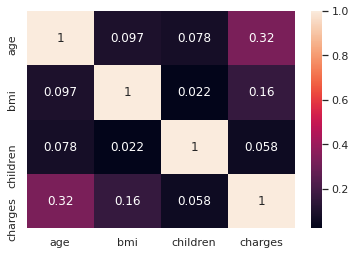

In [7]:
sns.heatmap(df[df.sex=="female"].corr(), annot=True)

Podemos ver, sin embargo, que no existe una correlación lineal aparente entre pares de variables. Para corroborar esto, les propongo que construyamos un diagrama de dispersión (también llamado "scatterplot").

In [ ]:
sns.scatterplot(data=df, x="age", y="charges")

Prueba el siguiente scatterplot y discute con tus compañeros que concluyes de la visualización

In [ ]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")

# Algunas transformaciones comunes

## Categorización de variables numéricas

Del diagrama anterior, podemos concluir que las edades de los beneficiarios parecen estar distribuidas casi uniformemente.

En ocasiones, es interesante cambiar a variables categóricas las variables numéricas, usando intervalos. Con el ejemplo que estamos usando, parece razonable el categorizar a los beneficiarios usando los siguientes intervalos:

* `Adolescente`: Edades en el intervalo (17, 20),
* `Joven adulto`: Edades en el intervalo [20, 35),
* `Adulto`: Edades en el intervalo [35, 50), y
* `Adulto mayor`: Edades en el intervalo [50, 64].

Como decía, la razón para categorizar a los beneficiarios podría permitir asociarlos, por ejemplo, con una estabilidad económica típica de una edad. Para lograr la "discretización" descrita anteriormente, podemos usar la noción de corte, i.e. pandas cut `pd.cut()`, como se muestra en la celda siguiente. Ejecútela y analice el resultado.

In [ ]:
pd.cut(df.age, [17,20,35,50,64], labels=['Adolecente', 'Joven adulto', 'Adulto', 'Adulto mayor'])

Como se puede observar, el comando anterior nos permitió asignar a cada observación una categoria dependiendo del intervalo de edad al que pertenece el beneficiario del seguro. Lo que vamos a hacer ahora es agregar esa categoría como una columna adicional a nuestro dataset. Para eso, ejecutemos la siguiente celda:

In [ ]:
df['edad_cat'] = pd.cut(df.age, [17,20,35,50,64], labels=['Adolecente', 'Joven adulto', 'Adulto', 'Adulto mayor'])
df.head()

Como `edad_cat` aparece ya como otra variable en el dataset, es posible usarla directamente en la creación de diagramas.

### Transformación de variables categóricas en numéricas

Aunque parezca extraño, en ocasiones tendremos necesidad de transformar una variable categórica en numérica. En nuestro ejemplo, este tipo de transformación será útil para agregar las variables categóricas en el cálculo de el coeficiente de correlación y su correspondiente heapmap.

Para ilustrar el proceso, transformemos la variable `sex` en nuestro dataset. Para eso, ejecute la siguiente celda:

In [ ]:
df['sex_num'] = df.sex.astype('category') # Agrega una columna con información de tipo `category`
df['sex_num'].cat.categories = [1, 2]     # Las categorias ['female', 'male'] son reemplazadas por los valores [1, 2] resp.
df.head()

Después de lo anterior, `sex_num` se tomaría en cuenta para el cálculo del coeficiente de correlación.

### Eliminación de variables

En ocasiones tendrá necesidad de eliminar columnas, e.g. aquellas que vamos agregando durante el análisis. Para ilustrar la idea, ejecute la siguiente celda:

In [ ]:
df_nuevo = df.drop(columns=['sex_num'])
df_nuevo.head()

Es importante notar que `df` se mantiene con el mismo valor y es solo en `df_nuevo` que tendremos una copia del dataset sin las columnas que hayamos eliminado.

### Particionamiento del dataset

En ocasiones, nos interesa enfocarnos en una parte del dataset de acuerdo a un valor categórico. Por ejemplo, podemos particionar nuestro dataset en dos, uno con los beneficiarios masculinos y el otro con los beneficiarios femeninos. Para esto, podemos usar la siguientes instrucciones:

In [ ]:
hombres = df[df.sex=='male']
mujeres = df[df.sex=='female']

mujeres.head()

### Cálculo de estadísticos sobre grupos

Es también posible agrupar los renglones con respecto al valor de una variable categórica. Esto lo hicimos implícitamente cuando estabamos construyendo los diagramas de barras, determinando el número de beneficiarios por cada región. Podemos hacer algo similar con el siguiente código python:

In [ ]:
df.groupby('region')['region'].count()

Usando este mismo estilo, podemos aplicar funciones a los valores agrupados por cada columna. Ejecute la siguiente celda y analice el resultado:

In [ ]:
df.groupby('region').agg({'age': 'mean', 'bmi': ['min', 'max', 'mean'], 'charges': 'mean'})

En algunas ocasiones, usted se verá con la necesidad de calcular la frecuencia relativa de alguna variable (e.g. porcentajes). Para esto, les propongo usar el siguiente método:

In [ ]:
numrenglones = df.region.size
df.groupby('region')['region'].count()/numrenglones